In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline
from IPython import display

import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

In [9]:
img = image.load_img("/Users/dhruvaggarwal/Documents/T-shirt/train/prisoners/frame0.jpg")

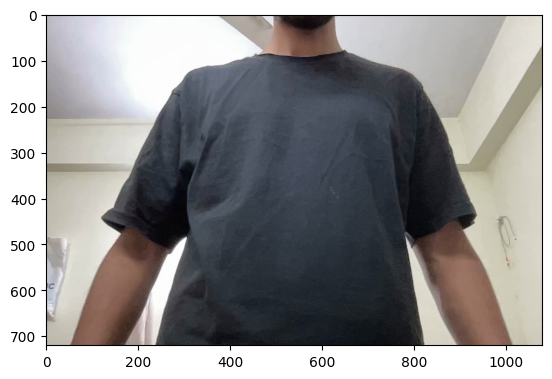

In [10]:
plt.imshow(img)

In [11]:
cv2.imread("/Users/dhruvaggarwal/Documents/T-shirt/train/prisoners/frame0.jpg").shape

(720, 1080, 3)

In [12]:
train = ImageDataGenerator(rescale=1/252)
validation = ImageDataGenerator(rescale=1/252)

In [13]:
train_dataset = train.flow_from_directory('/Users/dhruvaggarwal/Documents/T-shirt/train',target_size=(720,1080),
                                         batch_size=3,
                                         class_mode='binary')

validation_dataset = validation.flow_from_directory('/Users/dhruvaggarwal/Documents/T-shirt/val',target_size=(720,1080),
                                         batch_size=3,
                                         class_mode='binary')

Found 1594 images belonging to 2 classes.
Found 299 images belonging to 2 classes.


In [14]:
train_dataset.class_indices
validation_dataset.class_indices

{'civil': 0, 'prisoners': 1}

In [15]:
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation= 'relu', input_shape=(720,1080,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                #
                                    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                    
                                                            
                                  ])


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Initialize the CNN model
# model = Sequential()

# # Add convolutional layer
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(720, 1080, 3)))

# # Add max pooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Add another convolutional layer
# model.add(Conv2D(64, (3, 3), activation='relu'))

# # Add another max pooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flatten the layer
# model.add(Flatten())

# # Add fully connected layers
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))  # Add dropout for regularization
# model.add(Dense(1, activation='sigmoid'))  # Binary classification, so use sigmoid activation

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 718, 1078, 16)     448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 359, 539, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 357, 537, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 178, 268, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 176, 266, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 88, 133, 64)       0

In [16]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics =['accuracy'])

In [18]:
history = model.fit(train_dataset,
                     epochs=10,steps_per_epoch=3,
                     validation_data= validation_dataset)

Epoch 1/10
3/3 [==============================] - 50s 18s/step - loss: 27.5466 - accuracy: 0.3333 - val_loss: 6.3704 - val_accuracy: 0.4983
Epoch 2/10
3/3 [==============================] - 54s 23s/step - loss: 3.4663 - accuracy: 0.4444 - val_loss: 0.8825 - val_accuracy: 0.5017
Epoch 3/10
3/3 [==============================] - 61s 26s/step - loss: 0.4777 - accuracy: 0.8889 - val_loss: 0.7504 - val_accuracy: 0.5117
Epoch 4/10
3/3 [==============================] - 63s 26s/step - loss: 0.8025 - accuracy: 0.5556 - val_loss: 0.6422 - val_accuracy: 0.4983
Epoch 5/10
3/3 [==============================] - 95s 36s/step - loss: 0.6678 - accuracy: 0.4444 - val_loss: 0.7565 - val_accuracy: 0.5318
Epoch 6/10
3/3 [==============================] - 67s 24s/step - loss: 0.9346 - accuracy: 0.4444 - val_loss: 0.5897 - val_accuracy: 0.8127
Epoch 7/10
3/3 [==============================] - 88s 34s/step - loss: 0.5601 - accuracy: 0.7778 - val_loss: 0.6044 - val_accuracy: 0.5987
Epoch 8/10
3/3 [==========

In [20]:
model.save('finalUniformDetection.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 16s 148ms/step - loss: 0.7793 - accuracy: 0.5251
Validation Loss: 0.7792832255363464
Validation Accuracy: 0.525083601474762
100/100 [==============================] - 16s 158ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       150
           1       0.00      0.00      0.00       149

    accuracy                           0.50       299
   macro avg       0.25      0.50      0.33       299
weighted avg       0.25      0.50      0.34       299



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

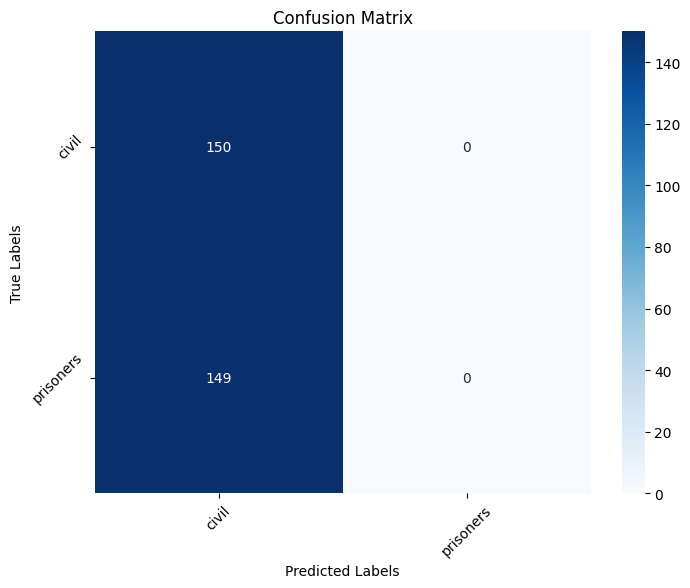

In [22]:
# loss_train = history.history['accuracy']
# loss_val = history.history['val_accuracy']
# epochs = range(0,7)
# plt.plot(epochs, loss_train, 'g', label='Training accuracy')
# plt.plot(epochs, loss_val, 'b', label='validation accuracy')
# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# Load the trained model
# model = load_model('path_to_your_trained_model.h5')

# Evaluate the model on validation dataset
val_loss, val_accuracy = model.evaluate(validation_dataset)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Predict labels for validation dataset
validation_dataset.reset()  # Reset generator before predicting
y_pred = model.predict(validation_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
true_classes = validation_dataset.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, y_pred_classes)

# Print classification report
print(classification_report(true_classes, y_pred_classes))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=validation_dataset.class_indices.keys(),
            yticklabels=validation_dataset.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()




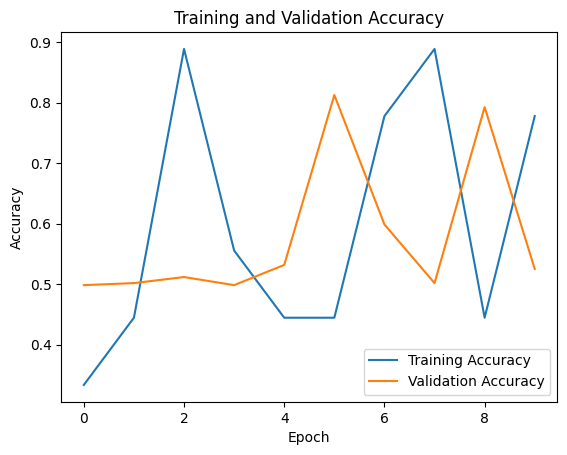

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [3]:
model = load_model('/Users/dhruvaggarwal/Desktop/video analytics project/finalUniformDetection.h5')

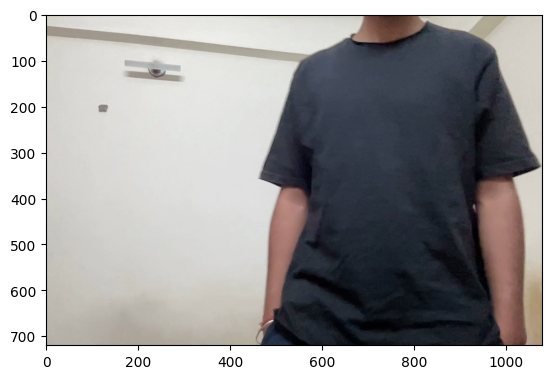

1/1 [==============================] - 2s 2s/step
[[1.]]
Wearing Uniform
Allowed!


In [5]:
img = image.load_img("/Users/dhruvaggarwal/Documents/T-shirt/train/prisoners/frame_52.jpg",target_size=(720,1080,3))
plt.imshow(img)
plt.show()
    
X = image.img_to_array(img)
X = np.expand_dims(X, axis = 0)
images = np.vstack([X])
val = model.predict(images)
print(val)
if val<7.7e-6:
    print("No Uniform!!!\nNot Allowed!!!")
else:
    print("Wearing Uniform\nAllowed!")

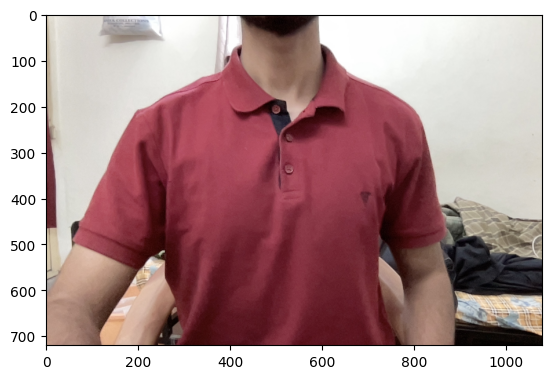

1/1 [==============================] - 0s 446ms/step
[[9.600805e-18]]
No Uniform!!!
Not Allowed!!!


In [5]:

img = image.load_img("/Users/dhruvaggarwal/Documents/T-shirt/test/frame0.jpg",target_size=(720,1080,3))
plt.imshow(img)
plt.show()
    
X = image.img_to_array(img)
X = np.expand_dims(X, axis = 0)
images = np.vstack([X])
val = model.predict(images)
print(val)
if val<7.7e-6:
    print("No Uniform!!!\nNot Allowed!!!")
else:
    print("Wearing Uniform\nAllowed!")

In [4]:

import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# Initialize webcam
video_capture = cv2.VideoCapture('/Users/dhruvaggarwal/Downloads/4115286-sd_426_226_25fps.mp4')

# Check if the webcam is opened successfully
# if not video_capture.isOpened():
#     print("Error: Could not open webcam")
#     exit()

# Process each frame from the webcam
while True:
    ret, frame = video_capture.read()
    if not ret:
        print("Error: Could not read frame from webcam")
        break

    # Resize frame to match input size of the model
    frame = cv2.resize(frame, (1080, 720))

    # Convert frame to RGB (required by Keras)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert frame to array and expand dimensions
    frame_array = np.expand_dims(frame_rgb, axis=0)

    # Preprocess frame
    frame_array = frame_array / 255.0  # Rescale pixel values to [0, 1]

    # Make prediction
    prediction = model.predict(frame_array)

    # Determine the predicted class based on prediction probability
    predicted_class = 1 if prediction > 7.7e-6 else 0

    # Display the frame with predicted class
    if predicted_class == 0:
        cv2.putText(frame, "Wearing Uniform Allowed!!!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    else:
        cv2.putText(frame, "No Uniform!!! Not Allowed!!!", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Video', frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture object and close all windows
video_capture.release()
cv2.destroyAllWindows()



1/1 [==============================] - 2s 2s/step


2024-04-09 13:01:44.483 Python[4767:93149] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


1/1 [==============================] - 0s 129ms/step


KeyboardInterrupt: 

: 